<a href="https://colab.research.google.com/github/KorStats/suwonbus/blob/main/2_1_2_%EA%B5%AC%EB%B3%84_%EC%8A%B9%EC%B0%A8%EC%9D%B8%EC%9B%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'3. 23년 경도위도로 주소 찾기.ipynb의 사본의 사본'  'My Drive'
'4-1. Binary Tree.html'				    '(다인) 이슈분석.ipynb의 사본'
'Colab Notebooks'				     ★데이터분석언어


In [ ]:
!sudo apt-get install -y fonts-nanum #글꼴 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and direc

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/★데이터분석언어/★최종제출/DATA/★2023년9월데이터.csv', encoding='utf-8-sig')

In [ ]:
df_suwon=df[df['정류장_시']=='수원시'] #정류장 수원시 데이터만 df_suwon에 저장

In [ ]:
df_suwon.head(3)

,노선,일자,정류장순번,정류장,위도,경도,모바일단축번호,정류장_시,정류장_구,도시명,...,21,22,23,0,1,2,3,total,요일,요일구분
0,1007-1,2023-09-02(토),4,무궁화전자,37.261767,127.063767,4110.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,6,토,주말
1,1007-1,2023-09-02(토),5,원천삼성아파트,37.265217,127.060650,4094.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,3,토,주말
2,1007-1,2023-09-02(토),6,원일초교,37.266650,127.059367,4088.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,3,토,주말


In [ ]:
cnt=df_suwon.groupby('정류장_구')['total'].sum() #정류장_구별 승차인원합계(total)
cnt

정류장_구
권선구    162395
영통구    215389
장안구    350739
팔달구    193058
Name: total, dtype: int64

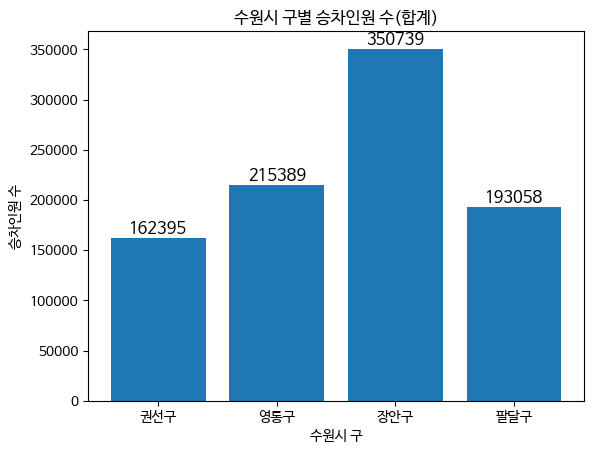

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
bar=plt.bar(cnt.index, cnt.values)
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0, height, height, ha='center', va='bottom', size=12)

plt.xlabel("수원시 구")     # x축 제목
plt.ylabel("승차인원 수") # y축제목
plt.title("수원시 구별 승차인원 수(합계)")# 그래프 제목
plt.show()

In [ ]:
df1=df_suwon.loc[df_suwon['요일구분']=='평일']
df2=df_suwon.loc[df_suwon['요일구분']=='주말']
cnt1=df1.groupby(['정류장_구'])['total'].sum()
cnt2=df2.groupby(['정류장_구'])['total'].sum()

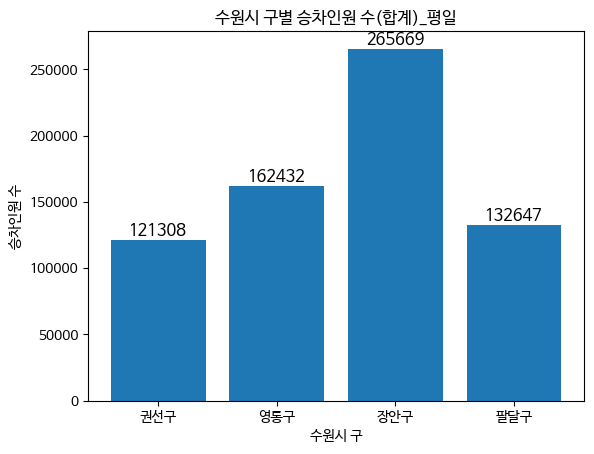

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
bar=plt.bar(cnt1.index, cnt1.values)
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0, height, height, ha='center', va='bottom', size=12)

plt.xlabel("수원시 구")     # x축 제목
plt.ylabel("승차인원 수") # y축제목
plt.title("수원시 구별 승차인원 수(합계)_평일")# 그래프 제목
plt.show()

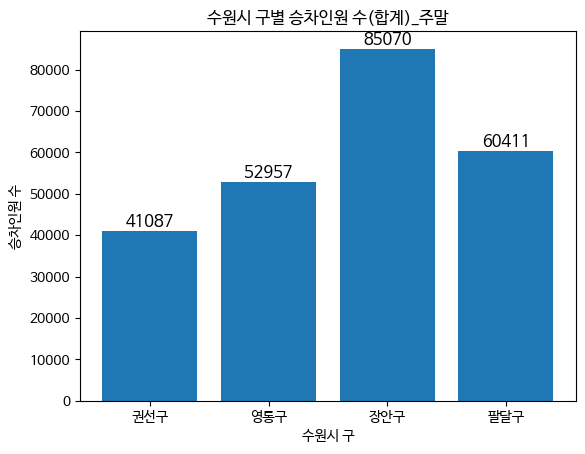

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
bar=plt.bar(cnt2.index, cnt2.values)
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0, height, height, ha='center', va='bottom', size=12)

plt.xlabel("수원시 구")     # x축 제목
plt.ylabel("승차인원 수") # y축제목
plt.title("수원시 구별 승차인원 수(합계)_주말")# 그래프 제목
plt.show()

수원시 승차인원 합계는 서울과 가장 근접한 "장안구"에서 제일 많았다.

In [ ]:
df.head(3)

,노선,일자,정류장순번,정류장,위도,경도,모바일단축번호,정류장_시,정류장_구,도시명,...,21,22,23,0,1,2,3,total,요일,요일구분
0,1007-1,2023-09-02(토),4,무궁화전자,37.261767,127.063767,4110.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,6,토,주말
1,1007-1,2023-09-02(토),5,원천삼성아파트,37.265217,127.060650,4094.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,3,토,주말
2,1007-1,2023-09-02(토),6,원일초교,37.266650,127.059367,4088.0,수원시,영통구,수원시,...,0,0,0,0,0,0,0,3,토,주말


In [ ]:
df2=df.loc[df['요일구분']=='평일']
df2=df2.loc[df['정류장_시']=='수원시'] #수원시 정류장 승차인원만 분석

In [ ]:
df2.head(3)

,노선,일자,정류장순번,정류장,위도,경도,모바일단축번호,정류장_시,정류장_구,도시명,...,21,22,23,0,1,2,3,total,요일,요일구분
10392,7001,2023-09-04(월),0,수원버스터미널,37.250950,127.019550,2214.0,수원시,권선구,수원시,...,0,0,0,0,0,0,0,21,월,평일
10393,7001,2023-09-04(월),2,수원버스터미널,37.250950,127.019550,2214.0,수원시,권선구,수원시,...,1,0,0,0,0,0,0,20,월,평일
10394,7001,2023-09-04(월),3,수원아이파크시티.선일초교,37.247467,127.028067,2252.0,수원시,권선구,수원시,...,1,1,0,0,0,0,0,43,월,평일


In [ ]:
df2=df2.drop(['위도', '경도', '모바일단축번호'], axis=1)
df2.head(2)

,노선,일자,정류장순번,정류장,정류장_시,정류장_구,도시명,관리도시명,4,5,...,21,22,23,0,1,2,3,total,요일,요일구분
10392,7001,2023-09-04(월),0,수원버스터미널,수원시,권선구,수원시,경기도,0,0,...,0,0,0,0,0,0,0,21,월,평일
10393,7001,2023-09-04(월),2,수원버스터미널,수원시,권선구,수원시,경기도,0,1,...,1,0,0,0,0,0,0,20,월,평일


In [ ]:
df_group=df2.groupby(['노선', '정류장', '정류장순번']).sum()
df_group.loc['7770'].sort_values(by='정류장순번').style.background_gradient()

<ipython-input-33-9a4cf6f7cde7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group=df2.groupby(['노선', '정류장', '정류장순번']).sum()


,,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,total
정류장,정류장순번,,,,,,,,,,,,,,,,,,,,,,,,,
차고지출발(경유),1,0,0,0,0,0,4,5,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,14
수원역,3,176,212,356,531,713,365,228,264,356,347,348,423,561,912,1238,689,524,407,415,198,270,155,162,113,9963
고등동구터미널,4,17,33,46,66,141,56,50,50,34,27,20,29,30,39,50,24,19,29,15,5,5,11,4,2,802
고등동사거리,5,4,27,152,245,226,82,64,61,42,43,22,25,30,31,54,13,17,12,6,2,5,4,1,1,1169
수원여고.푸르지오자이,6,17,154,578,742,715,218,165,120,141,103,64,60,135,156,77,44,20,22,19,7,3,9,6,3,3578
병무청입구,7,35,143,359,656,598,331,212,167,177,120,109,150,139,157,174,65,49,36,24,12,19,9,16,3,3760
글로벌청소년드림센터,8,29,82,393,385,322,158,104,100,72,61,43,41,68,59,42,19,13,14,7,7,1,1,2,7,2030
화서문.장안공원,9,25,146,429,508,425,269,180,136,145,123,103,99,122,229,194,87,84,84,53,13,6,3,6,3,3472
장안공원,10,28,28,93,152,131,78,49,43,74,80,79,105,117,165,134,96,96,120,84,48,18,13,5,0,1836


In [ ]:
df_group.loc['8800'].sort_values(by='정류장순번').style.background_gradient()

,,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,total
정류장,정류장순번,,,,,,,,,,,,,,,,,,,,,,,,,
수원버스터미널,0,0,106,269,250,108,86,84,75,84,53,37,34,49,33,14,34,27,35,27,7,0,0,0,0,1412
터미널사거리(경유),1,0,3,16,12,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
수원버스터미널,2,0,81,266,380,124,52,45,69,54,34,28,25,38,19,38,17,8,16,7,3,0,0,0,0,1304
수원아이파크시티.선일초교,3,0,217,928,795,553,301,246,177,184,133,101,92,101,78,42,34,26,25,18,9,0,0,0,0,4060
평생교육학습관.남수원중학교,4,0,227,1066,930,764,349,280,272,241,166,153,146,131,102,84,31,38,47,53,22,0,0,0,0,5102
매탄위브하늘채.경기아트센터,5,0,97,769,858,670,337,245,229,181,148,150,123,124,148,56,48,55,56,69,30,0,0,0,0,4393
삼성1차아파트,6,0,175,681,652,629,320,233,213,138,133,111,106,104,89,92,60,53,35,46,20,0,0,0,0,3890
구법원사거리,7,0,106,235,260,604,273,228,226,205,173,153,158,177,134,124,77,79,79,41,47,0,0,0,0,3379
아주대.아주대학교병원,8,0,138,310,188,546,505,433,439,500,609,490,679,811,703,457,298,226,306,196,139,0,0,0,0,7973
